In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

In [ ]:
# url = "https://raw.githubusercontent.com/Romka678/Machine_Learning/master/Video_Games_Sales_as_at_22_Dec_2016.csv"
data_raw = pd.read_csv(url)

# Описание и чтение

In [7]:
data_raw.shape

(16719, 16)

Таблица содержит данные о продаже 16719 игр с рейтингами,каждой игре соответсвует платформа,на которой ее запускали,год релиза игры,категория игры,издательство игры,продажи в Северной Америке,продажи в Европе,продажи в Японии и продажи в других странах,продажи в целом по всему миру(измеряются в миллионах копий),оценки критиков Metacritic,колличество критиков Metacritic,оценка подписчиков Metacritic,количество подписчиков,давших оценку игре,разработчик игры и возрастной рейтинг игры.

Посмотрим на размеры таблицы - количество строк (каждая строка соответствует названию игры) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [4]:
data_raw.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_raw.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_raw

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Столбцы (признаки) имеют имена:
* Name-Название игры
* Platform-Платформа,на которой она запускалась
* Year_of_Release-Год релиза игры
* Genre-Жанр игры
* Publisher-Издательство игры
* NA_Sales-Продажи в Северной Америке
* EU_Sales-Продажи в Европе
* JP_Sales-Продажи в Японии
* Other_Sales-Другие продажи(в других странах)
* Global_Sales-Продажи во всем мире, в целом
* Critic_Score-Оценки критиков
* Critic_Count-Количество критиков,давших оценку игре
* User_Score-Оценки пользователей
* User_Count-Количество пользователей,давших оценку игре
* Developer-Разработчик игры
* Rating-Возрастной рейтинг игры

Признаки Name,Platform,Genre,Publisher,Developer,Rating - номинальные (категориальные),Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count - количественные(числовые)

Требуется классифицировать игры какого жанра издавались больше всего в период 1980-2020 год.(Задача классификации)

# Визуализация данных

In [9]:
print(data_raw.shape)
print(data_raw.columns)

(16719, 16)
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


In [10]:
data_raw.index

RangeIndex(start=0, stop=16719, step=1)

In [11]:
data_raw.describe(include='all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


Для каждого количественного признака приведены:

* Cредние значения (mean) - среднее арифметическое
* Cтандартное отклонение (std) - показатель рассеивания значений случайной величины относительно её математического ожидания.
* Минимальное и макимальное значения(min,max)
* Медиана(top) - это значение делящее распределение пополам. Другими словами это значение ниже которого находятся половина значений, и выше также половина всех значений в распределении.
* Колличество самого частого встречаемого значения(freq)
* Значения квантилей - значение, которое заданная случайная величина не превышает с фиксированной вероятностью.

# Обработка категориальных признаков

Столбцы 'Genre', 'Platform', 'Publisher', 'Developer', 'Rating','User_Score' содержат категориальные признаки. Пока они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [181]:
data_raw['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform',
                  'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation',
                  'Sports', 'Strategy'],
                 ordered=False)

In [99]:
data_raw['Genre'] = data_raw['Genre'].astype('category')
data_raw['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform',
                  'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation',
                  'Sports', 'Strategy'],
                 ordered=False)

In [100]:
data_raw['Platform'].dtype

CategoricalDtype(categories=['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN',
                  'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3',
                  'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS',
                  'Wii', 'WiiU', 'X360', 'XB', 'XOne'],
                 ordered=False)

In [101]:
data_raw['Platform'] = data_raw['Platform'].astype('category')
data_raw['Platform'].dtype

CategoricalDtype(categories=['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN',
                  'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3',
                  'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS',
                  'Wii', 'WiiU', 'X360', 'XB', 'XOne'],
                 ordered=False)

In [102]:
data_raw['Publisher'].dtype

CategoricalDtype(categories=['10TACLE Studios', '1C Company',
                  '20th Century Fox Video Games', '2D Boy', '3DO', '49Games',
                  '505 Games', '5pb', '7G//AMES', '989 Sports',
                  ...
                  'Zushi Games', 'bitComposer Games', 'dramatic create',
                  'fonfun', 'iWin', 'id Software', 'imageepoch Inc.',
                  'inXile Entertainment', 'mixi, Inc', 'responDESIGN'],
                 ordered=False)

In [103]:
data_raw['Publisher'] = data_raw['Publisher'].astype('category')
data_raw['Publisher'].dtype

CategoricalDtype(categories=['10TACLE Studios', '1C Company',
                  '20th Century Fox Video Games', '2D Boy', '3DO', '49Games',
                  '505 Games', '5pb', '7G//AMES', '989 Sports',
                  ...
                  'Zushi Games', 'bitComposer Games', 'dramatic create',
                  'fonfun', 'iWin', 'id Software', 'imageepoch Inc.',
                  'inXile Entertainment', 'mixi, Inc', 'responDESIGN'],
                 ordered=False)

In [104]:
data_raw['Developer'].dtype

CategoricalDtype(categories=['10tacle Studios', '10tacle Studios, Fusionsphere Systems',
                  '1C, 1C Company', '1C, Ino-Co, 1C Company',
                  '1C, Various, 1C Company', '1C: Maddox Games', '1C:Ino-Co',
                  '1st Playable Productions', '2015', '2D Boy',
                  ...
                  'id Software', 'id Software, Nerve Software',
                  'id Software, Raven Software', 'n-Space', 'neo Software',
                  'odenis studio', 'oeFun', 'puzzle.tv', 'syn Sophia',
                  'zSlide'],
                 ordered=False)

In [105]:
data_raw['Developer'] = data_raw['Developer'].astype('category')
data_raw['Developer'].dtype

CategoricalDtype(categories=['10tacle Studios', '10tacle Studios, Fusionsphere Systems',
                  '1C, 1C Company', '1C, Ino-Co, 1C Company',
                  '1C, Various, 1C Company', '1C: Maddox Games', '1C:Ino-Co',
                  '1st Playable Productions', '2015', '2D Boy',
                  ...
                  'id Software', 'id Software, Nerve Software',
                  'id Software, Raven Software', 'n-Space', 'neo Software',
                  'odenis studio', 'oeFun', 'puzzle.tv', 'syn Sophia',
                  'zSlide'],
                 ordered=False)

In [106]:
data_raw['Rating'].dtype

CategoricalDtype(categories=['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'], ordered=False)

In [107]:
data_raw['Rating'] = data_raw['Rating'].astype('category')
data_raw['Rating'].dtype

CategoricalDtype(categories=['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'], ordered=False)

In [124]:
data_raw['User_Score'].dtype

CategoricalDtype(categories=['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1',
                  '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2',
                  '2.1', '2.2', '2.3', '2.4', '2.5', '2.6', '2.7', '2.8',
                  '2.9', '3', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
                  '3.8', '3.9', '4', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
                  '4.7', '4.8', '4.9', '5', '5.1', '5.2', '5.3', '5.4', '5.5',
                  '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2', '6.3', '6.4',
                  '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2', '7.3',
                  '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
                  '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1',
                  '9.2', '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd'],
                 ordered=False)

In [157]:
data_raw['User_Score'] = data_raw['User_Score'].astype('category')

In [165]:
data_raw['Name'] = data_raw['Name'].astype('category')

In [166]:
categor_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'category']
num_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'category']
print(categor_columns)
print(num_columns)

['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer', 'Rating']
['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count']


In [142]:
data_raw.describe(include=['category'])

,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16719,16719,16719,16719,16719,16719
unique,31,12,581,96,1696,8
top,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,2161,3372,1410,9129,6827,10760


Построим попарные матрицы разброса:

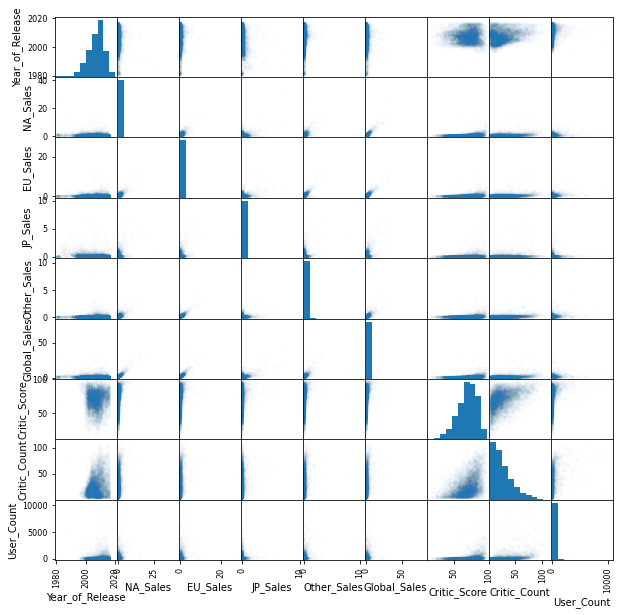

In [61]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_raw, alpha = .01, figsize = (10, 10))
pass

Вычислим матрицу корреляции для количественных признаков.Используем визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции.

In [182]:
corr_mat=data_raw.corr()

In [184]:
corr_mat

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.092427,0.003684,-0.168461,0.037530,-0.076476,-0.006417,0.130877,0.117709
NA_Sales,-0.092427,1.000000,0.765336,0.449598,0.638654,0.941010,0.172929,0.243872,0.208496
EU_Sales,0.003684,0.765336,1.000000,0.435068,0.722796,0.901239,0.180717,0.263949,0.271543
JP_Sales,-0.168461,0.449598,0.435068,1.000000,0.291096,0.612300,0.098274,0.091652,0.034694
Other_Sales,0.037530,0.638654,0.722796,0.291096,1.000000,0.749242,0.170271,0.255615,0.247382
Global_Sales,-0.076476,0.941010,0.901239,0.612300,0.749242,1.000000,0.189724,0.263008,0.234568
Critic_Score,-0.006417,0.172929,0.180717,0.098274,0.170271,0.189724,1.000000,0.394183,0.242509
Critic_Count,0.130877,0.243872,0.263949,0.091652,0.255615,0.263008,0.394183,1.000000,0.389130
User_Count,0.117709,0.208496,0.271543,0.034694,0.247382,0.234568,0.242509,0.389130,1.000000


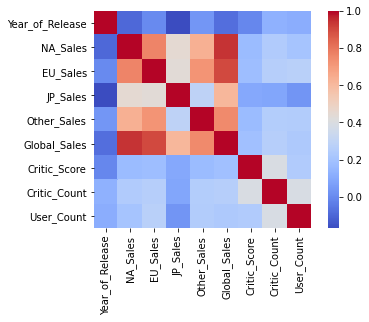

In [183]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Коллинеарными называются признаки, которые сильно коррелируют друг с другом. В машинном обучении это приводит к снижению производительности обобщения данных из-за высокой дисперсии и меньшей интерпретируемости модели. Сильно коррелированные друг с другом переменные дают модели одну и ту же информацию, следовательно, для анализа не нужно использовать их все.

Построим диаграммы рассеивания:

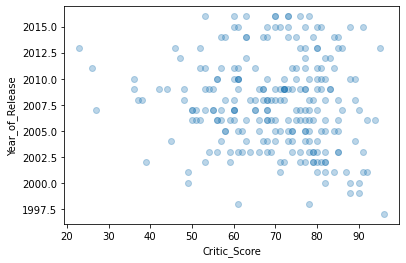

In [32]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=500, replace=False)
plt.scatter(data_raw.iloc[random_subset]['Critic_Score'], data_raw.iloc[random_subset]['Year_of_Release'], alpha=0.3)
plt.ylabel('Year_of_Release')
plt.xlabel('Critic_Score')
pass

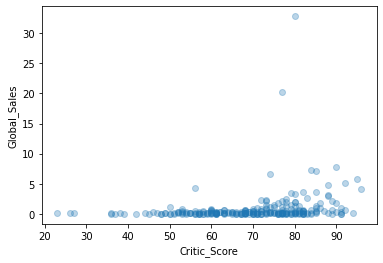

In [44]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=500, replace=False)
plt.scatter(data_raw.iloc[random_subset]['Critic_Score'], data_raw.iloc[random_subset]['Global_Sales'], alpha=0.3)
plt.ylabel('Global_Sales')
plt.xlabel('Critic_Score')
pass

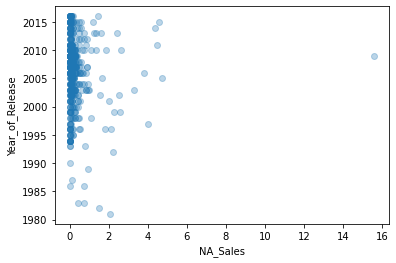

In [77]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=500, replace=False)
plt.scatter(data_raw.iloc[random_subset]['NA_Sales'], data_raw.iloc[random_subset]['Year_of_Release'], alpha=0.3)
plt.ylabel('Year_of_Release')
plt.xlabel('NA_Sales')
pass

# Обработка пропущенных значений

Посмотрим, сколько пропущенных значений в каждом столбце матрицы

In [78]:
data_raw.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Необходимо заполнить пропущенные значения средним или медианой (для количественных признаков) или модой (для номинальных признаков).

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [79]:
data_raw.fillna(data_raw.median(axis = 0), axis = 0, inplace=True)

In [80]:
data_raw.isna().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6704
User_Count            0
Developer          6623
Rating             6769
dtype: int64

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [81]:
data_raw['Name'].fillna(data_raw['Name'].mode().iloc[0], inplace=True)
data_raw['Genre'].fillna(data_raw['Genre'].mode().iloc[0], inplace=True)
data_raw['Publisher'].fillna(data_raw['Publisher'].mode().iloc[0], inplace=True)
data_raw['User_Score'].fillna(data_raw['User_Score'].mode().iloc[0], inplace=True)
data_raw['Developer'].fillna(data_raw['Developer'].mode().iloc[0], inplace=True)
data_raw['Rating'].fillna(data_raw['Rating'].mode().iloc[0], inplace=True)

In [82]:
data_raw.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

# Нормализация количественных признаков

Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [168]:
data_num = data_raw[num_columns]
data_num.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000
mean,2006.495604,0.263330,0.145025,0.077602,0.047332,0.533543,70.010886,23.609068,86.752856
std,5.831862,0.813514,0.503283,0.308818,0.186710,1.547935,9.776336,13.509406,384.376835
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,71.000000,21.000000,24.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,71.000000,21.000000,24.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [180]:
data_num = (data_num - data_num.mean(axis = 0))/data_num.std(axis = 0)
data_num.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,1.671900e+04,1.671900e+04,1.671900e+04,1.671900e+04,1.671900e+04,1.671900e+04,1.671900e+04,1.671900e+04,1.671900e+04
mean,2.041193e-15,3.899294e-17,-2.099529e-15,6.387386e-14,8.774009e-16,-2.405377e-15,3.681561e-14,2.317938e-15,-6.841262e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.543250e+00,-3.236950e-01,-2.881574e-01,-2.512875e-01,-2.535044e-01,-3.382200e-01,-5.831519e+00,-1.525535e+00,-2.152910e-01
25%,-5.993976e-01,-3.236950e-01,-2.881574e-01,-2.512875e-01,-2.535044e-01,-3.059189e-01,1.011743e-01,-1.931297e-01,-1.632587e-01
50%,8.648974e-02,-2.253561e-01,-2.484184e-01,-2.512875e-01,-1.999454e-01,-2.348565e-01,1.011743e-01,-1.931297e-01,-1.632587e-01
75%,6.009052e-01,-2.867848e-02,-6.959266e-02,-1.217614e-01,-9.282731e-02,-4.104996e-02,1.011743e-01,-1.931297e-01,-1.632587e-01
max,2.315623e+00,5.051748e+01,5.725399e+01,3.284263e+01,5.635838e+01,5.297151e+01,2.862945e+00,6.616940e+00,2.752051e+01


# Pешение задачи классификации